# Рекомендательные системы

**План:**

1. Архитектура
2. Коллаборативная фильтрация
3.
4.
5.
6.
7.

## Пункт 1

**Дано:**

$U = \bigl\{u_1, u_2, ... u_n\bigr\}$ - users

$I = \bigl\{i_1, i_2, ... i_m\bigr\}$ - items

для некоторых пар $(u, i) \in U*I \space ∃ \space r_{ui}$ - рейтинг

Что может быть рейтингом (на примере ютуб):

- лайк, комментарий, репост (да/нет; 0/1)
- сколько посмотрел (какую долю) ($\mathbb{R}$, вещественное)
- оценка видео, как в кинопоиске ($\bigl\{{1, 2, ... 10}\bigr\}$, дискретное)

Пусть $R = \bigl\{(u, i)| \space ∃ \space r_{ui} \bigr\}$ - аналог обучающей выборки

$|R| <<<<< U*I$

Задача построить модель

$a: U*I → Y$

$a(u, i) ∼ r_{ui}$

**Архитектура:**

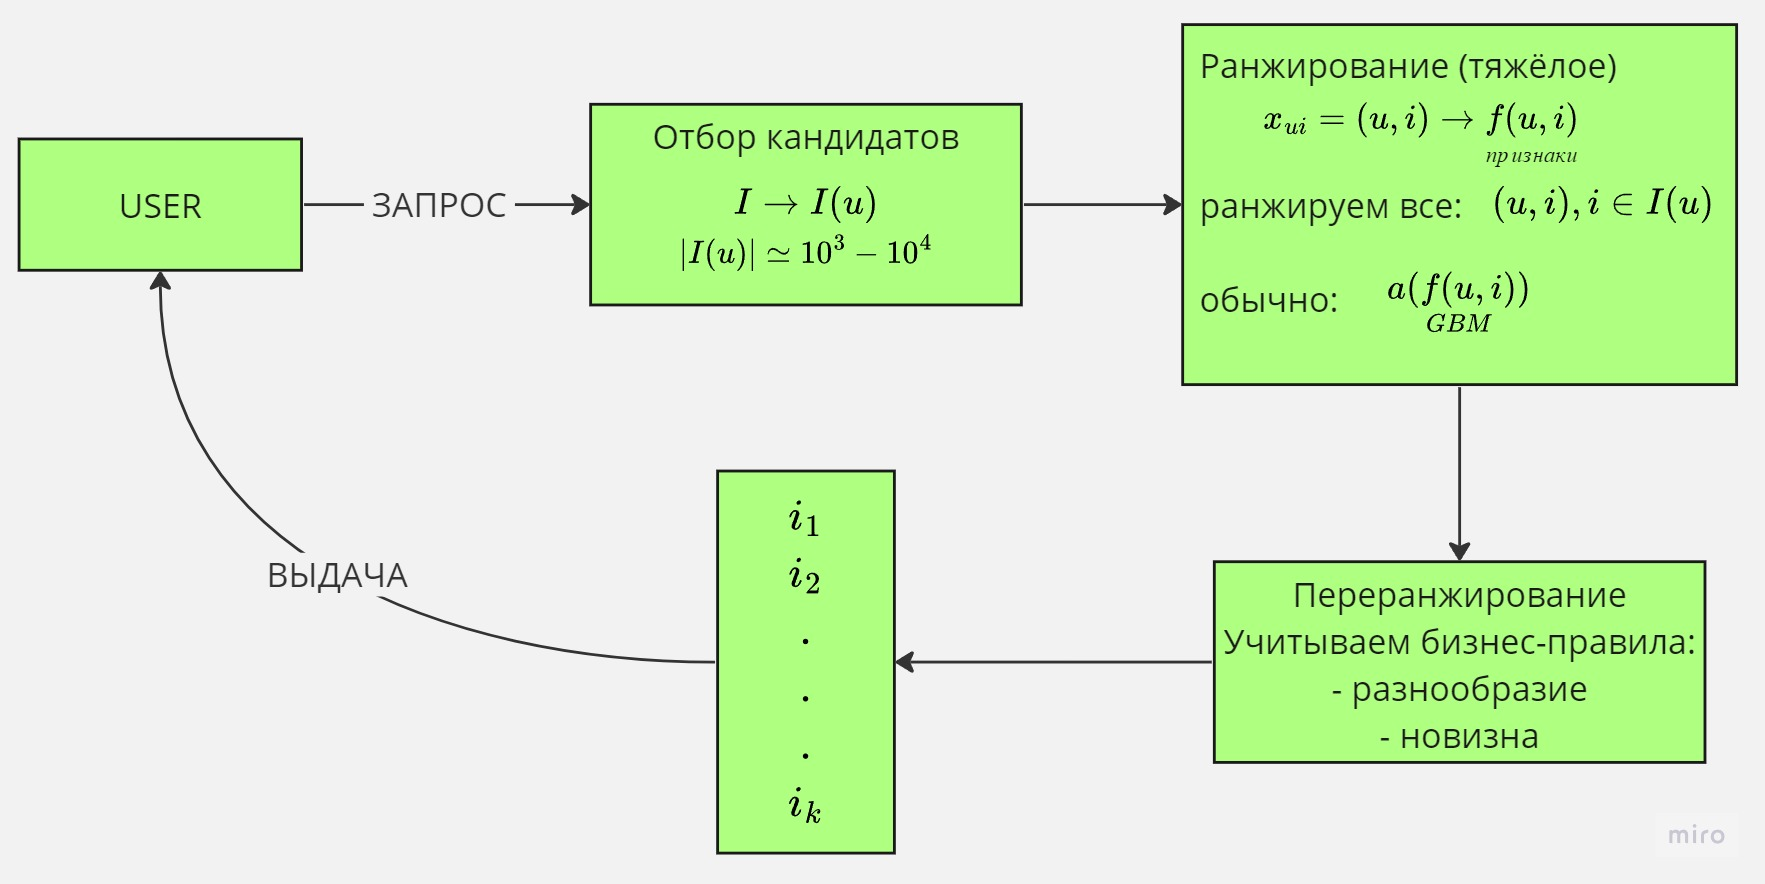

**Notes:**

- Отбор кандидатов: на этом этапе можно учитывать, какие каналы, тематики видео предпочитает пользователь, учесть новые видео, построить какую-то модель - суть в том, чтобы по минимуму отсеять кандидатов и оставить самый релевантный список

- Переранжирование:
    - Грубый пример: какому-то юзеру могут попадаться видео с одинаковыми превьюшками и контентом, костыльным способом разнообразить предлагаемый список
    - Норм пример: мы обучили модель, отранжировали по вероятностям контент, выдали юзеру список рекомендаций. Но при этом не учитывается, что пользователь будет смотреть видео сверху вниз, и после просмотра первого видео вероятности клика на второй, третий и т.д. уже изменятся: ему они будут не так интересны. Цель состоит в том, чтобы сделать рекомендации разнообразными

## Пункт 2

Идея состоит в следующем: item - обычно что-то сложное (видео, песни, звук), поэтому не будем анализировать контент, а будем использовать только информацию о взаимодействии

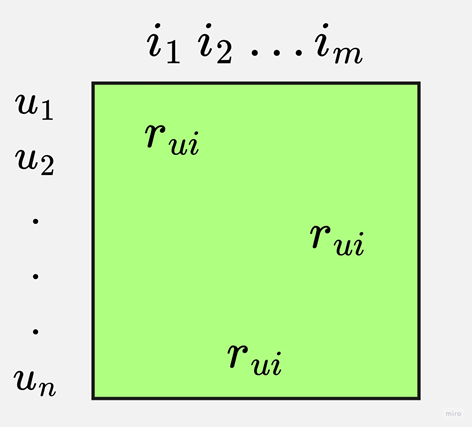

**Memory-based методы**

==================================================================

1. **User-based:**

> $I_{uv} = \bigl\{i \in I \space | \space ∃ \space r_{ui} \space and \space ∃ \space r_{vi}\bigr\}$
>
> $sim(u, v) = \huge\frac{Σ_{i \in I_{uv}}(r_{ui}-\overline{r_{u}})*(r_{vi}-\overline{r_v})}{\sqrt{Σ_{i \in I_{uv}}(r_{ui}-\overline{r_u})^2*Σ_{i \in I_{uv}}(r_{vi}-\overline{r_v})^2}}$ - корреляция Пирсона
>
> $u_0 → \underset{коллаборация}{U(u_0)} = \bigl\{u \in U \space | \space sim(u, u_{0} > α \bigl\}$ - типа друзья по интересам
>
> $score(i) = \frac{1}{|U(u_0)|} \underset{\underset{∃ \space r_{ui}}{u \in U(u_0)}}{\space Σ \space \space r_{ui}}$ - средний рейтинг (насколько item в среднем понравился друзьям по интересам)
>
> Далее по ранжируем по скору. По сути здесь мы ничего не обучаем

==================================================================

2. **Item-based:**

> $sim(i_1, i_2) = ...$ - просто считаем корреляцию между двумя item'ами
>
> Далее берем для пользователя все item'ы, которые он уже смотрел, и для них подбираем похожие
>
> Формулы в целом аналоичные предыдущему

==================================================================

+: простые в реализации

-: не учитываем кластеры интересов

-: плохо работает, если мало информации

-: очень долго

-: не обучается

**Модели со скрытыми переменными (let and factor models | LFM)**


Идея:

Заэмбеддим user'ы и item'ы в единое пространство, так что каждый из них будет описываться каким-то вектором и углы между векторами будут описывать сходство

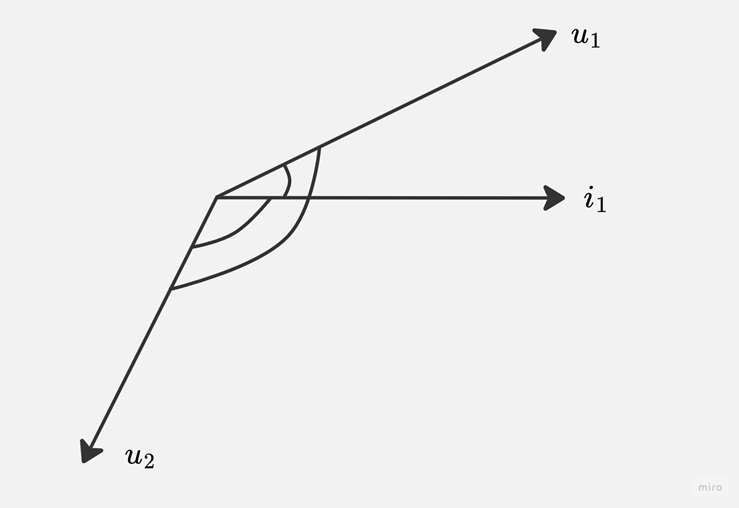

$u → p_u \in \mathbb{R}^{d}$ (для каждого пользователя будем обучать некоторый вектор p размерности d)

$i → q_i \in \mathbb{R}^{d}$ (для каждого айтема будем обучать некоторый вектор q размерности d)

Требование: $<p_u, q_i> ≃ r_{ui}$

Функционал для обучения: $Σ(r_{ui} - w_u - w_i - <p_u, q_i>)^2 → \underset{\underset{p_u, q_i \in \mathbb{R}^{d}}{w_u, w_i \in \mathbb{R}}}{min}$

(рейтинг - сдвиг для юзера - сдвиг для айтема - скалярное пр-е)

Если рейтинги бинарные, то можно использовать не квадрат отклонения, а logloss, например.

Как этот подход можно интерпретировать:

Например, у нас есть какие-то жанры и мы хотим пользователей и айтемов описать тем, насколько они относятся к этим жанрам:

$p_u = (\overset{комедия}{100}, \overset{драма}{-10}, ...)$ - насколько юзер любит соответсвующие жанры

$q_i = (-500, 98, ...)$ - - насколько видео относится к жанру

Грубо говоря, мы хотим выучить какие-то свойства наших юзеров и айтемов и матчить их дальше по отношению к этим свойствам

**Наблюдения:**

> 1. Это модели на основе матричных разложений
>
>
>
>
>
>
>